In [1]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [3]:
conn = connect_mysql()
query = 'select * from lol_datas'
df = pd.DataFrame(sql_execute_dict(conn,query))
conn.close()

In [4]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25',
       'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'summoner1Id', 'summoner2Id', 'turretKills', 'firstTowerKill',
       'totalMinionsKilled', 'pentaKills', 'championId', 'pickTurn'],
      dtype='object')

In [5]:
len(df)

48360

# 점멸 d일때 f일때 승률

In [6]:
tmp = df[['teamPosition','championName','summoner1Id', 'summoner2Id','win']].rename(columns={'summoner1Id':'spell_D','summoner2Id':'spell_F'})

In [7]:
tmp

,teamPosition,championName,spell_D,spell_F,win
0,TOP,Jax,4,12,False
1,JUNGLE,Taliyah,4,11,False
2,MIDDLE,Leblanc,12,4,False
3,BOTTOM,Ezreal,4,7,False
4,UTILITY,Xerath,21,4,False
...,...,...,...,...,...
48355,,Yone,2202,2201,False
48356,,Fiora,2201,2202,False
48357,,KSante,2202,2201,True
48358,,Shaco,2201,2202,True


In [8]:
tmp[tmp.win =='True']

,teamPosition,championName,spell_D,spell_F,win
5,TOP,Garen,4,14,True
6,JUNGLE,Graves,4,11,True
7,MIDDLE,Ahri,12,4,True
8,BOTTOM,Vayne,6,4,True
9,UTILITY,Milio,7,4,True
...,...,...,...,...,...
48347,MIDDLE,Yasuo,12,4,True
48348,BOTTOM,Ezreal,7,4,True
48349,UTILITY,Nautilus,4,3,True
48357,,KSante,2202,2201,True


In [9]:
tmp['win'] = tmp.apply(lambda x:1 if x.win == 'True' else 0,axis=1)

In [10]:
tmp

,teamPosition,championName,spell_D,spell_F,win
0,TOP,Jax,4,12,0
1,JUNGLE,Taliyah,4,11,0
2,MIDDLE,Leblanc,12,4,0
3,BOTTOM,Ezreal,4,7,0
4,UTILITY,Xerath,21,4,0
...,...,...,...,...,...
48355,,Yone,2202,2201,0
48356,,Fiora,2201,2202,0
48357,,KSante,2202,2201,1
48358,,Shaco,2201,2202,1


In [11]:
tmp_d=tmp[tmp.spell_D=='4']
tmp_f=tmp[tmp.spell_F=='4']

In [12]:
tmp_win=tmp_d[tmp_d.win== 1]
tmp_win2=tmp_f[tmp_f.win== 1]

In [13]:
D_winrate=round(len(tmp_win)/len(tmp_d)*100,2)
F_winrate=round(len(tmp_win2)/len(tmp_f)*100,2)

In [14]:
D_winrate

49.79

In [15]:
F_winrate 

50.13

In [16]:
# -----------------------------------------------------------------

# 라인별 벤율 TOP3

In [17]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25',
       'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'summoner1Id', 'summoner2Id', 'turretKills', 'firstTowerKill',
       'totalMinionsKilled', 'pentaKills', 'championId', 'pickTurn'],
      dtype='object')

In [18]:
team_df = df[df.teamId == 100]
team_df2 = df[df.teamId == 200]

In [19]:
team_df = team_df[['gameId','championName','teamPosition','championId','teamId']]
team_df2 = team_df2[['gameId','championName','teamPosition','championId','teamId']]

In [20]:
team_df

,gameId,championName,teamPosition,championId,teamId
0,KR_6664833049,Jax,TOP,126,100
1,KR_6664833049,Taliyah,JUNGLE,895,100
2,KR_6664833049,Leblanc,MIDDLE,55,100
3,KR_6664833049,Ezreal,BOTTOM,950,100
4,KR_6664833049,Xerath,UTILITY,35,100
...,...,...,...,...,...
48347,KR_6883567307,Yasuo,MIDDLE,163,100
48348,KR_6883567307,Ezreal,BOTTOM,43,100
48349,KR_6883567307,Nautilus,UTILITY,41,100
48357,KR_6883582630,KSante,,110,100


In [21]:
team_df2

,gameId,championName,teamPosition,championId,teamId
5,KR_6664833049,Garen,TOP,39,200
6,KR_6664833049,Graves,JUNGLE,238,200
7,KR_6664833049,Ahri,MIDDLE,22,200
8,KR_6664833049,Vayne,BOTTOM,421,200
9,KR_6664833049,Milio,UTILITY,360,200
...,...,...,...,...,...
48353,KR_6883567307,Kaisa,BOTTOM,122,200
48354,KR_6883567307,Blitzcrank,UTILITY,22,200
48355,KR_6883582630,Yone,,350,200
48356,KR_6883582630,Fiora,,75,200


In [22]:
tmp=team_df[['championId','teamId']].groupby('championId').count().rename(columns={'teamId':'cnt'})

In [23]:
team_df

,gameId,championName,teamPosition,championId,teamId
0,KR_6664833049,Jax,TOP,126,100
1,KR_6664833049,Taliyah,JUNGLE,895,100
2,KR_6664833049,Leblanc,MIDDLE,55,100
3,KR_6664833049,Ezreal,BOTTOM,950,100
4,KR_6664833049,Xerath,UTILITY,35,100
...,...,...,...,...,...
48347,KR_6883567307,Yasuo,MIDDLE,163,100
48348,KR_6883567307,Ezreal,BOTTOM,43,100
48349,KR_6883567307,Nautilus,UTILITY,41,100
48357,KR_6883582630,KSante,,110,100


In [24]:
tmp2 =team_df2[['championId','teamId']].groupby('championId').count().rename(columns={'teamId':'cnt'})

In [25]:
tmp

,cnt
championId,
-1,703
1,6
2,32
3,10
4,24
...,...
895,26
897,120
902,57


In [26]:
tmp2

,cnt
championId,
-1,770
1,2
2,38
3,8
4,18
...,...
895,28
897,114
902,71


In [27]:
cnt_tmp = tmp.sort_values(by = 'cnt',ascending = False)

In [28]:
cnt_tmp2 = tmp2.sort_values(by = 'cnt',ascending = False)

In [29]:
cnt_tmp

,cnt
championId,
53,1848
48,896
24,883
517,866
64,827
...,...
13,2
44,2
42,2


In [30]:
cnt_tmp2

,cnt
championId,
53,1795
517,885
48,875
24,853
64,805
...,...
161,2
1,2
96,2


In [31]:
import requests

In [32]:
url = f'https://ddragon.leagueoflegends.com/cdn/13.24.1/data/ko_KR/champion.json'

In [33]:
res = requests.get(url).json()

In [34]:
data  = res['data']

In [35]:
dic = {}

In [36]:
for i in data : 
    dic[data[i]['key']] = data[i]['name']

In [37]:
cp_df = [dic]
new_df = pd.DataFrame(cp_df)
champion_df = new_df.transpose().reset_index()
champion_df.columns = ['championId','championName']

In [39]:
champion_df = champion_df.astype({'championId':'int'})

In [40]:
blue_ban = pd.merge(cnt_tmp,champion_df,on='championId')

In [41]:
blue_ban['per']= round(blue_ban['cnt']/len(team_df),4)*100

In [56]:
blue_ban=blue_ban.head(5)

In [57]:
blue_ban

,championId,cnt,championName,per
0,53,1848,블리츠크랭크,7.64
1,48,896,트런들,3.71
2,24,883,잭스,3.65
3,517,866,사일러스,3.58
4,64,827,리 신,3.42


In [44]:
red_ban = pd.merge(cnt_tmp2,champion_df,on='championId')

In [45]:
red_ban['per']= round(red_ban['cnt']/len(team_df2),4)*100

In [58]:
red_ban=red_ban.head(5)

In [59]:
red_ban

,championId,cnt,championName,per
0,53,1795,블리츠크랭크,7.42
1,517,885,사일러스,3.66
2,48,875,트런들,3.62
3,24,853,잭스,3.53
4,64,805,리 신,3.33


Text(0.5, 1.0, 'BLUE팀 벤율')

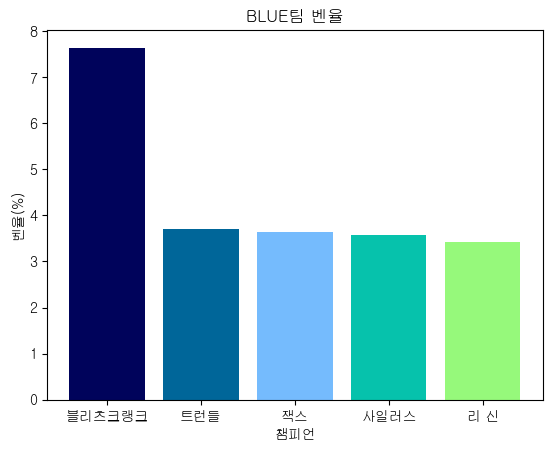

In [69]:
plt.figure()
plt.bar(blue_ban.championName,blue_ban.per,color =['#00035b','#006699','#75bbfd','#06c2ac','#96f97b'])
plt.xlabel('챔피언')
plt.ylabel('벤율(%)')
plt.title('BLUE팀 벤율')

Text(0.5, 1.0, 'RED팀 벤율')

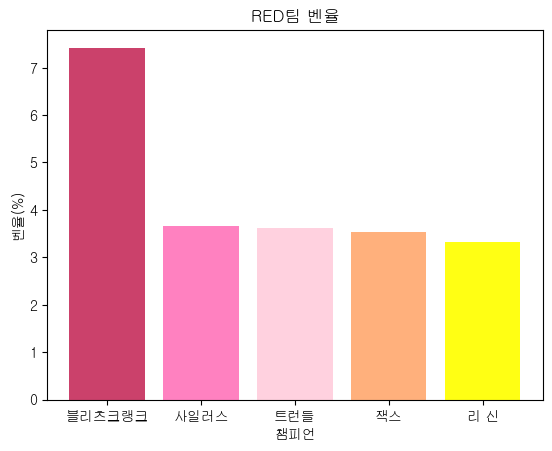

In [77]:
plt.figure()
plt.bar(red_ban.championName,red_ban.per,color =['#cb416b','#ff81c0','#ffd1df','#ffb07c','#ffff14'])
plt.xlabel('챔피언')
plt.ylabel('벤율(%)')
plt.title('RED팀 벤율')